### 课堂代码

In [1]:
import torch
import numpy as np
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
 
# prepare dataset
 
 
class DiabetesDataset(Dataset):
    def __init__(self, filepath):
        xy = np.loadtxt(filepath, delimiter=',', dtype=np.float32)
        self.len = xy.shape[0] # shape(多少行，多少列)
        self.x_data = torch.from_numpy(xy[:, :-1])
        self.y_data = torch.from_numpy(xy[:, [-1]])
 
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]
 
    def __len__(self):
        return self.len
 
 
dataset = DiabetesDataset('diabetes.csv')
train_loader = DataLoader(dataset=dataset, batch_size=32, shuffle=True, num_workers=0) #num_workers 多线程
 
 
# design model using class
 
 
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6)
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 1)
        self.sigmoid = torch.nn.Sigmoid()
 
    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        return x
 
 
model = Model()
 
# construct loss and optimizer
criterion = torch.nn.BCELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
 
# training cycle forward, backward, update
if __name__ == '__main__':
    for epoch in range(100):
        for i, data in enumerate(train_loader, 0): # train_loader 是先shuffle后mini_batch
            inputs, labels = data
            y_pred = model(inputs)
            loss = criterion(y_pred, labels)
#             print(epoch, i, loss.item())
 
            optimizer.zero_grad()
            loss.backward()
 
            optimizer.step()

### 课堂作业（titanic竞赛）

After 10 epoch, Loss is 0.4906361997127533
After 20 epoch, Loss is 0.4829919934272766
After 30 epoch, Loss is 0.44863414764404297
After 40 epoch, Loss is 0.39266303181648254
After 50 epoch, Loss is 0.34344613552093506
After 60 epoch, Loss is 0.4401909410953522
After 70 epoch, Loss is 0.3987981379032135
After 80 epoch, Loss is 0.4670858383178711
After 90 epoch, Loss is 0.44775643944740295
After 100 epoch, Loss is 0.24459992349147797


<IPython.core.display.Javascript object>


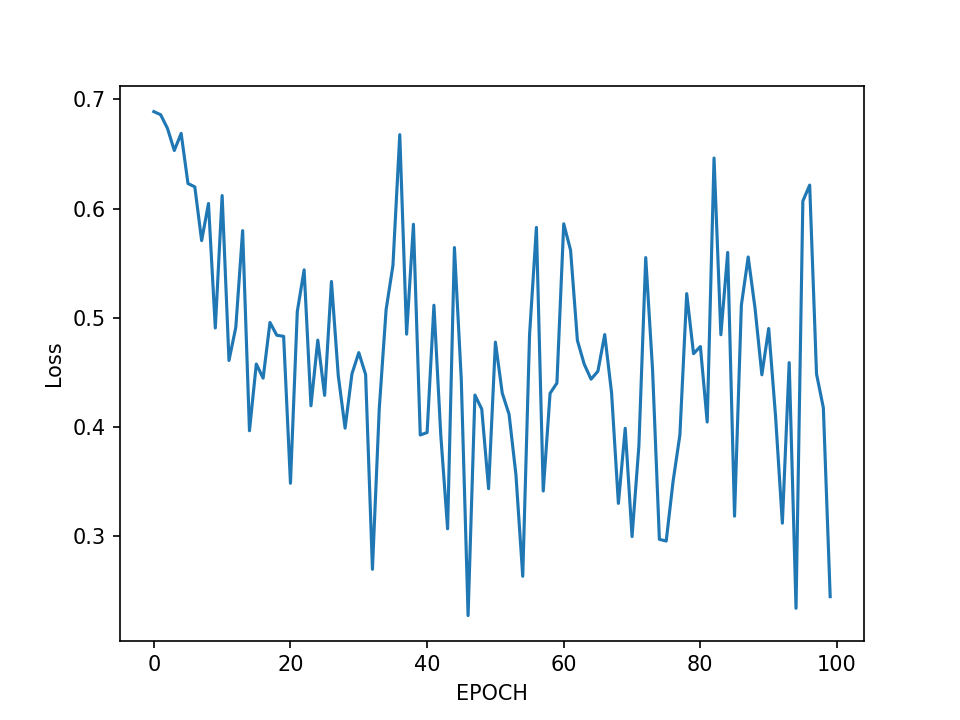

In [36]:
import torch
from torch.utils.data import DataLoader
from torch.utils.data import Dataset  # 抽象类
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

# 准备数据
class MyDataset(Dataset):
    def __init__(self,filePath):  # 定义x,y
        xy = pd.read_csv(filePath, sep=',')
        self.len = len(xy)
        features = ['Pclass','Sex','SibSp','Parch']  # 训练特征
        # 将训练数据里指定feature的数据转化为onehot编码表示，get_dummies()表示将features以one-hot编码表示
        # dataframe->numpy->Tensor类型
        self.x_data = torch.Tensor(np.array(pd.get_dummies(xy[features])))  
        self.y_data = torch.Tensor(np.array(xy['Survived'])).view(len(xy),1)  # view()将一维向量转化为二维矩阵 dataframe->numpy->Tensor
        
        
    def __getitem__(self, index):  # 定义按索引返回的（x,y）
        return self.x_data[index], self.y_data[index]  # 根据索引返回一个元组
    
    def __len__(self):
        return self.len

dataset = MyDataset('dataset/titanic/train.csv')  # 实例化
train_loader = DataLoader(dataset,  # 加载数据
                         batch_size=32,
                         shuffle=True,
                         num_workers=0)

# 构造模型
class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.linear1 = torch.nn.Linear(5,8)
        self.linear2 = torch.nn.Linear(8,4)
        self.linear3 = torch.nn.Linear(4,1)
        self.activate = torch.nn.ReLU()
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.activate(self.linear1(x))
        x = self.activate(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        return x

model = Model()
        

# 构造损失函数 优化器
criterion = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

# 循环迭代训练
EPOCH = 100
loss_ls = []
for i in range(EPOCH):
    for j, (x_data,y_data) in enumerate(train_loader,0):  # 从第0个开始 0可以省略
        y_pred = model(x_data)  # 前向传播
        loss = criterion(y_pred,y_data)  # 注意这个y_pred 和 y_data不能换位置 否则报错！！！！！！！！！！！
#         loss_ls.append(loss)
#         print('\tEPOCH:{}  {} Loss:{}'.format(i+1,j,loss.item()))
        
        
        optimizer.zero_grad()  # 梯度清零
        loss.backward()  # 反向传播
        optimizer.step()  # 更新
    loss_ls.append(loss)
    if (i+1)%10 == 0:
        print('After {} epoch, Loss is {}'.format(i+1,loss.item()))

plt.plot(loss_ls)
plt.xlabel('EPOCH')
plt.ylabel('Loss')
plt.show()

In [64]:
import pandas as pd
import numpy as np
import torch
xy = pd.read_csv('dataset/titanic/train.csv',sep=',')
features =  ["Pclass", "Sex", "SibSp","Parch"]
x_data = pd.get_dummies(xy[features])
y_data = xy['Survived']
x_data = torch.Tensor(np.array((x_data)))
x_data

tensor([[3., 1., 0., 0., 1.],
        [1., 1., 0., 1., 0.],
        [3., 0., 0., 1., 0.],
        ...,
        [3., 1., 2., 1., 0.],
        [1., 0., 0., 0., 1.],
        [3., 0., 0., 0., 1.]])

In [66]:
pd.get_dummies(xy[features])

,Pclass,SibSp,Parch,Sex_female,Sex_male
0,3,1,0,0,1
1,1,1,0,1,0
2,3,0,0,1,0
3,1,1,0,1,0
4,3,0,0,0,1
...,...,...,...,...,...
886,2,0,0,0,1
887,1,0,0,1,0
888,3,1,2,1,0
889,1,0,0,0,1


In [57]:
torch.Tensor(np.array(xy['Survived'])).view(891,1)

tensor([[0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
      

In [45]:
len(dataset)

891

In [56]:
type(xy['Survived'])

pandas.core.series.Series

In [78]:
y_data

tensor([0.])